In [3]:
import pandas as pd
import numpy as np
import jieba 
import collections
import re
import wordcloud
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import colors
from matplotlib import mlab
from matplotlib import rcParams

In [6]:
da=pd.read_csv('TrainData.csv')
text=pd.DataFrame(da['微博中文内容'].astype(str))

In [7]:
t=[]
for i in range(0,10000):
    t.append(text.iloc[i,0])
t=str(t)

In [8]:
def stopwordslist(filepath):
    stopword = [line.strip() for line in open(filepath, 'r').readlines()]
    return stopword
   
def cut(text): 
    cutsentence = jieba.lcut(text)     #精确模式 
    stopwords = stopwordslist(filepath)
    cut = []
    for word in cutsentence:
        if word not in stopwords:     
            if word != '\t':
                cut.append(word)
    return cut
filepath= 'stop_words8.txt'  
stopwordslist(filepath)
m=cut(t)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.753 seconds.
Prefix dict has been built succesfully.


In [9]:
jihe = set(m)
m1= list(jihe)
m_bag = {}
number = 0
for ele in m1:
    number = number +1
    m_bag[ele] = number 
print(jihe)


{'殿下', '热门', '粮后', '专业级', '便捷', 'Kkkk', '休息区', '怀疑', '期盼', '整体', '160', '捡', '背部', '千灯', '仕博', '逃跑', '侵权', '哈尔滨市', '搭进', '长度', '桃桃', '选中', '练就', '广告词', '堆里', 'lyf', '紧急令', '1.4', '结晶', 'W', '坚贞', '商业模式', '脸部', '测量', '变暖', '蕨代霜蛟', '胡绍', '内地', '窗边', '秦梓昕', '创作者', '事要', 'Freewriting', '接触传染', '报名者', '致词', '去年', '积水潭', '新衣', '蟊', '耷', '不太会', '干才', '合同法', '杀害', 'O14', '腰带', '一变', '十六分', '敬礼', '赵县', '预售', '崩溃', '困境', '媸', '改扩建', '蛋挞', '耸听', '挎', '行政长官', '收治', '题目', 'Studio', '无疾而终', '借埃', '留点', '耿耿于怀', '告诫', '儿童公园', '返购', '烟雨', '二十四节气', '阿君', '武义', '问号', '小路', '山神', '辅以', '新闻频道', '欢笑', '老公', 'Peng', '延续', '超爱', '母胎', '一分', '攻坚克难', '展开讨论', '同济', '注视', '四份', '統計', '薛好', '五湖四海', '欢乐', '记下来', '屋里', '極', '二期', '装饰', '測試', '留', '胃病', '触痛', '莫高窟', '手挡', '时分', '铲平', '祸楚', 'O80', '等效', '年级', '光花', '炸至', '朱剑', '银川市', '秋季', '冬缘', '437', '层出不穷', '偷', '封閉', '体贴入微', '谩', '孙艺珍', '鲁迪', '最早', '陰性', '作息', '無奈', '入乡随俗', '一问', '贝勒', '聚餐', '迷雾', '戒严', '实时', '王一博开', '痞子', '巡查', '300uM', '显身手', '萋', '广告费', '省近', '

In [10]:
m_bag#编号

{'殿下': 1,
 '热门': 2,
 '粮后': 3,
 '专业级': 4,
 '便捷': 5,
 'Kkkk': 6,
 '休息区': 7,
 '怀疑': 8,
 '期盼': 9,
 '整体': 10,
 '160': 11,
 '捡': 12,
 '背部': 13,
 '千灯': 14,
 '仕博': 15,
 '逃跑': 16,
 '侵权': 17,
 '哈尔滨市': 18,
 '搭进': 19,
 '长度': 20,
 '桃桃': 21,
 '选中': 22,
 '练就': 23,
 '广告词': 24,
 '堆里': 25,
 'lyf': 26,
 '紧急令': 27,
 '1.4': 28,
 '结晶': 29,
 'W': 30,
 '坚贞': 31,
 '商业模式': 32,
 '脸部': 33,
 '测量': 34,
 '变暖': 35,
 '蕨代霜蛟': 36,
 '胡绍': 37,
 '内地': 38,
 '窗边': 39,
 '秦梓昕': 40,
 '创作者': 41,
 '事要': 42,
 'Freewriting': 43,
 '接触传染': 44,
 '报名者': 45,
 '致词': 46,
 '去年': 47,
 '积水潭': 48,
 '新衣': 49,
 '蟊': 50,
 '耷': 51,
 '不太会': 52,
 '干才': 53,
 '合同法': 54,
 '杀害': 55,
 'O14': 56,
 '腰带': 57,
 '一变': 58,
 '十六分': 59,
 '敬礼': 60,
 '赵县': 61,
 '预售': 62,
 '崩溃': 63,
 '困境': 64,
 '媸': 65,
 '改扩建': 66,
 '蛋挞': 67,
 '耸听': 68,
 '挎': 69,
 '行政长官': 70,
 '收治': 71,
 '题目': 72,
 'Studio': 73,
 '无疾而终': 74,
 '借埃': 75,
 '留点': 76,
 '耿耿于怀': 77,
 '告诫': 78,
 '儿童公园': 79,
 '返购': 80,
 '烟雨': 81,
 '二十四节气': 82,
 '阿君': 83,
 '武义': 84,
 '问号': 85,
 '小路': 86,
 '山神': 87,
 '辅以': 8

In [11]:
word_counts =collections.Counter(m)
word_counts_top = word_counts.most_common(100)

In [12]:
Output = "词频.txt"
fileOut = open(Output,'w',encoding='UTF-8')
fileOut.write('词语\t词频\n')
fileOut.write('——————————\n')
count = 0
for TopWord,Frequency in word_counts_top:                            
        if count == 100:
            break
        print(TopWord + '\t',str(Frequency))          
        fileOut.write(TopWord + '\t' + str(Frequency)  + '\n')
        count += 1
fileOut.close()          

 	 9999
武汉	 2686
肺炎	 2335
疫情	 2329
加油	 2218
新型	 1810
月	 1680
中国	 1478
冠状病毒	 1391
例	 1382
病例	 1364
患者	 1346
病毒	 1337
感染	 1256
医院	 1239
确诊	 1225
O	 1205
发热	 1017
生活	 1010
重症	 884
医生	 881
传播	 853
发烧	 813
湖北	 801
吃	 795
国家	 790
中	 738
医务人员	 722
新冠	 709
全国	 654
卫健委	 646
口罩	 624
丁香	 622
希望	 590
真的	 581
致敬	 574
年	 571
开学	 568
防控	 561
野味	 552
症状	 549
打卡	 549
新增	 539
工作	 535
接触	 533
想	 526
隔离	 517
延迟	 510
一线	 506
做	 503
新闻	 473
健康	 468
治疗	 464
院士	 455
李兰娟	 455
白衣战士	 453
2020	 435
出院	 433
病人	 430
发现	 429
专家	 422
名	 399
医护人员	 380
时间	 374
战疫	 374
医疗队	 363
咳嗽	 361
情况	 352
爱	 340
干咳	 329
上班	 326
钟南山	 320
疾病	 314
感冒	 308
湖北省	 308
10	 303
抗击	 302
死亡	 297
支援	 293
努力	 292
无症状	 291
平安	 290
上海	 285
承诺	 278
12	 277
救治	 273
转发	 272
人员	 272
治愈	 271
高福	 270
24	 268
原因	 267
期间	 264
武汉市	 263
新	 262
医疗	 255
报告	 253
太	 252
药物	 245
实时	 245


(-0.5, 1079.5, 864.5, -0.5)

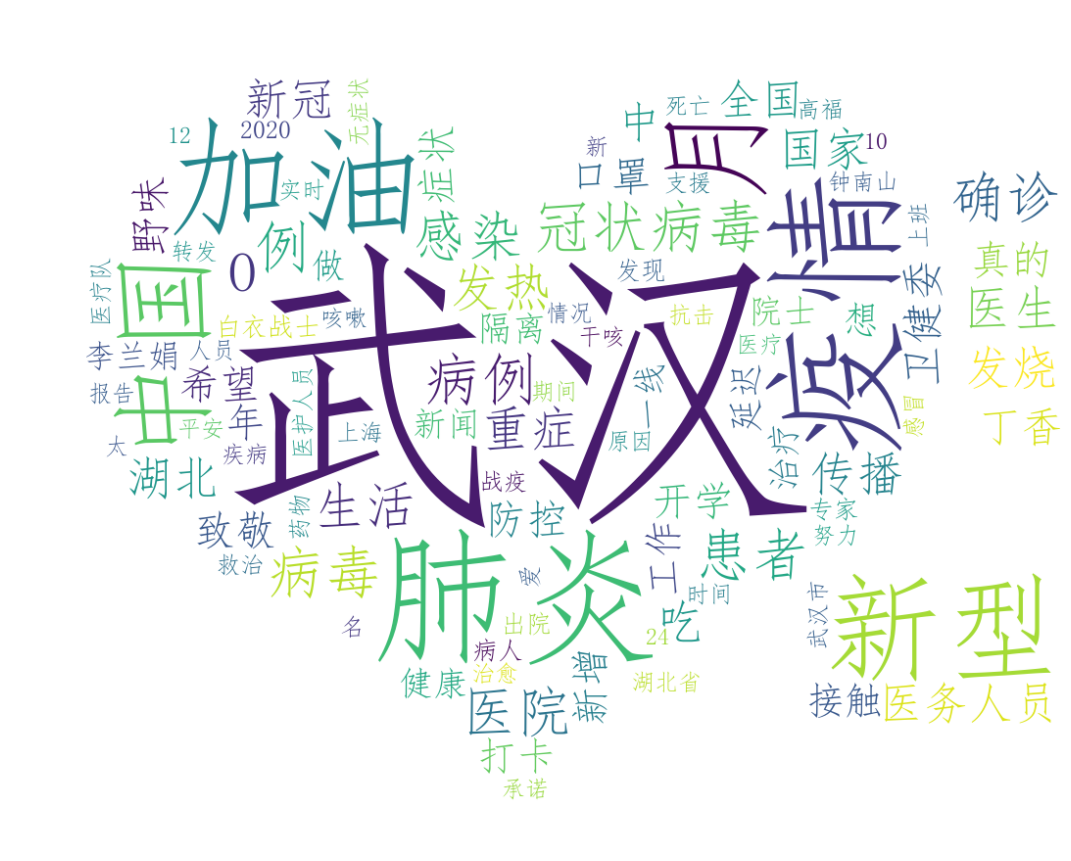

In [13]:
background = '词云背景.jpg'
color_list=['#FF0000','#a41a1a']#建立颜色数组
colormap=colors.ListedColormap(color_list)#调用
color_mask = cv2.imread("词云背景.jpg")

mask = np.array(Image.open(background))
wc = wordcloud.WordCloud(
    font_path = './Fonts/simfang.ttf',
    background_color='white',
    mask = color_mask,
    max_words= 100,
    max_font_size=500
)

wc.generate_from_frequencies(word_counts)                                        # 从字典生成词云
plt.figure('figue',figsize=(16,12))                                               # 弹框名称与大小
plt.subplots_adjust(top=0.99,bottom=0.01,right=0.99,left=0.01,hspace=0,wspace=0) # 调整边距
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')                       # 处理词云
plt.axis('off')

In [14]:
del word_counts_top[0]
x=[]
y=[]
for i in range(len(word_counts_top)):
    x.append(word_counts_top[i][0])
    y.append(word_counts_top[i][1])

Text(0.5, 1.0, '')

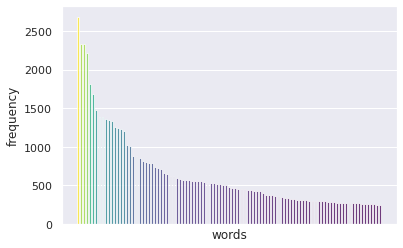

In [19]:
from matplotlib import cm
map_vir = cm.get_cmap(name='viridis')
y32 = np.array(y)
norm = plt.Normalize(y32.min(), y32.max())
norm_y = norm(y32)
colour = map_vir(norm_y)
plt.bar(x,y,color=colour,alpha = 0.75,width =0.6) 
#plt.bar(x,y,color=['slateblue','darkslateblue','mediumslateblue','mediumpurple','indigo','darkorchid','thistle','purple','m','magenta','orchid','deeppink'],
 #       alpha = 0.6,
  #      width =0.5) 
plt.xticks([])
plt.xlabel('words')
plt.ylabel('frequency')
plt.title('')

([], [])

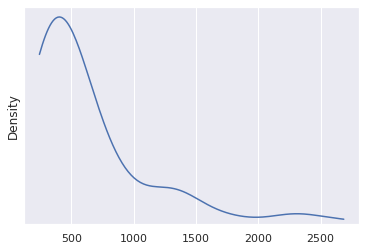

In [16]:
import seaborn as sns
sns.set()
sns.kdeplot(y32,cut=0)
plt.yticks([])

<AxesSubplot:ylabel='Density'>

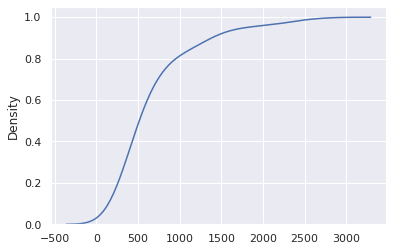

In [17]:
sns.kdeplot(y32,cumulative=True)#带累积分布

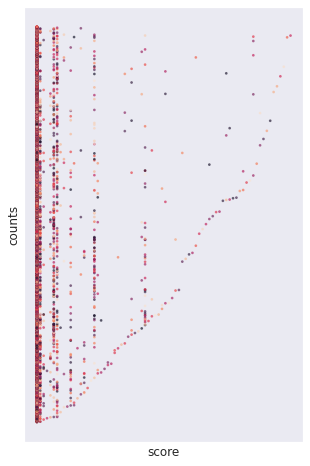

In [100]:
import csv
import pandas as pd
with open('Weibo_2020Coron(1).csv','r',encoding='gbk') as csvfile:
    reader = csv.reader(csvfile)
    column1 = [row[4] for row in reader]
    del column1[0]
with open('weibo_labled.csv','r',encoding='utf=8') as csvfile:
    reader = csv.reader(csvfile)
    column2= [row[7] for row in reader]
    del column2[0]
column_1=[]
for i in range(15000):
    if column1[i] != '':
        column_1.append(column1[i])
for i in range(15000-len(column_1)):
    del column2[-1]
x = np.array(column2)
y = np.array(column_1)
colors = np.random.rand(len(x))
plt.figure(figsize=(5, 8))
plt.yticks([])
plt.xticks([])
plt.xlabel('score')
plt.ylabel('counts')
area = np.pi * 1 **2
plt.scatter(x,y,c=colors,alpha=0.5,s=area)
plt.show()

拟合的方程为：Y = 0.000000X + 0.494190


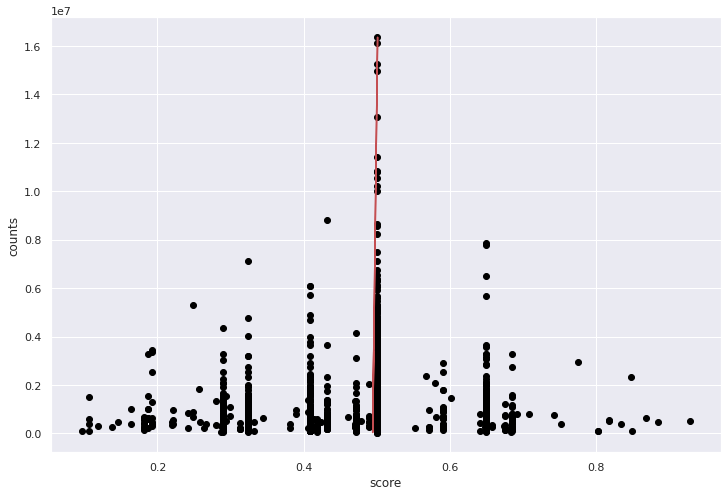

In [77]:
from sklearn.linear_model import LinearRegression
# 已有数据x y
# sklearn 拟合输入输出一般都是二维数组，这里将一维转换为二维。
x = list(map(float,x))
y = list(map(float,y))
height = np.reshape(y,(-1, 1))
temp = np.reshape(x,(-1, 1))
# 拟合
reg = LinearRegression()
reg.fit(height,temp)
a = reg.coef_[0][0]     # 系数
b = reg.intercept_[0]   # 截距
print('拟合的方程为：Y = %.6fX + %.6f' % (a, b))
# 可视化
prediction = reg.predict(height)                # 根据高度，按照拟合的曲线预测温度值
plt.figure('海拔高度~温度关系曲线拟合结果', figsize=(12,8))
plt.rcParams['font.family'] = ['sans-serif']    # 设置matplotlib 显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']    # 设置matplotlib 显示中文
plt.xlabel('score')
plt.ylabel('counts')
plt.scatter(temp, height, c='black')
plt.plot(prediction, height, c='r')
plt.show()


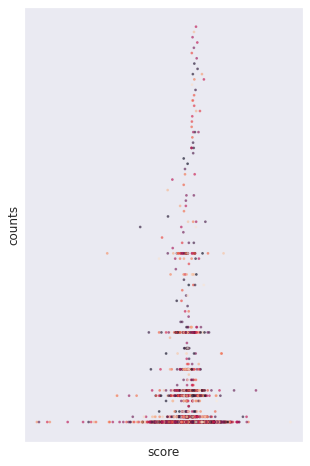

In [89]:
x1=[]
x2=[]
y1=[]
y2=[]
xnew=[]
ynew=[]
for i in range(4920):
    x1.append(column_1[i])
    y1.append(column2[i])
    x2.append(1-float(column_1[-i]))
    y2.append(column2[-i])
for i in range(4920):
    xnew.append(x1[i])
    ynew.append(y1[i])
for i in range(4920):
    xnew.append(x2[i])
    ynew.append(y2[i])
x_new = np.array(xnew)
y_new = np.array(ynew)
colors = np.random.rand(len(x))
plt.figure(figsize=(5, 8))
plt.yticks([])
plt.xticks([])
plt.xlabel('score')
plt.ylabel('counts')
area = np.pi * 1 **2
plt.scatter(x_new,y_new,c=colors,alpha=0.5,s=area)
plt.show()

拟合的方程为：Y = -73443.820717X + 15976.266233


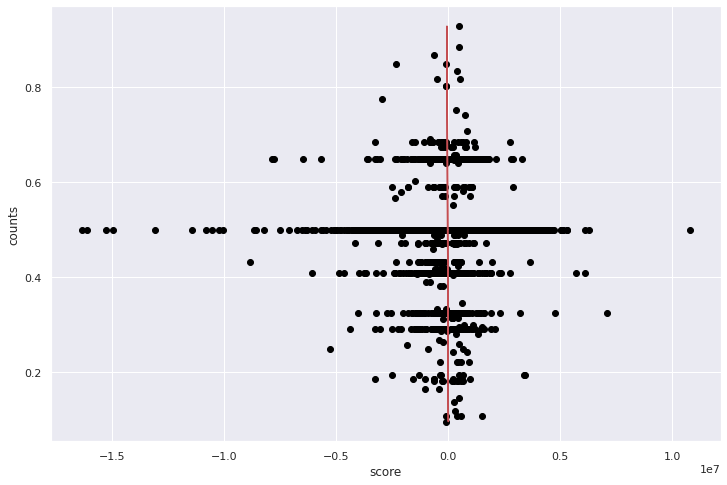

In [90]:
from sklearn.linear_model import LinearRegression
# 已有数据x y
# sklearn 拟合输入输出一般都是二维数组，这里将一维转换为二维。
x = list(map(float,x_new))
y = list(map(float,y_new))
height = np.reshape(y,(-1, 1))
temp = np.reshape(x,(-1, 1))
# 拟合
reg = LinearRegression()
reg.fit(height,temp)
a = reg.coef_[0][0]     # 系数
b = reg.intercept_[0]   # 截距
print('拟合的方程为：Y = %.6fX + %.6f' % (a, b))
# 可视化
prediction = reg.predict(height)                # 根据高度，按照拟合的曲线预测温度值
plt.figure('海拔高度~温度关系曲线拟合结果', figsize=(12,8))
plt.rcParams['font.family'] = ['sans-serif']    # 设置matplotlib 显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']    # 设置matplotlib 显示中文
plt.xlabel('score')
plt.ylabel('counts')
plt.scatter(temp, height, c='black')
plt.plot(prediction, height, c='r')
plt.show()

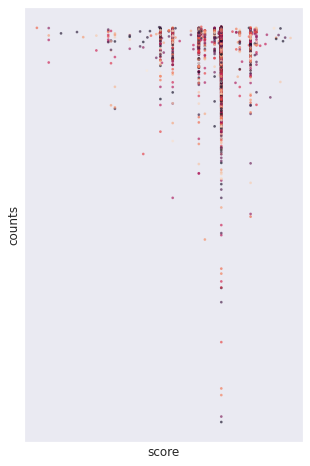

In [101]:
import math
for i in range(9840):
    column2[i]= math.log10(float(column2[i]))
    if float(column_1[i]) > 0.5:
        column_1[i]=1-float(column_1[i])
x = np.array(column2)
y = np.array(column_1)
colors = np.random.rand(len(x))
plt.figure(figsize=(5, 8))
plt.yticks([])
plt.xticks([])
plt.xlabel('score')
plt.ylabel('counts')
area = np.pi * 1 **2
plt.scatter(x,y,c=colors,alpha=0.5,s=area)
plt.show()